# Notebook 10: Análisis combinado de resultados

Este notebook integra los resultados de todos los experimentos anteriores (Notebook 7-9) para realizar un análisis comparativo.

Se incluyen:

- Métricas de recomendación: RMSE, MAE, Precision@K, Recall@K, Coverage, Diversity, Novelty.
- Emisiones de CO2 como proxy de coste computacional.
- Trade-offs entre calidad de recomendación y coste energético.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

results_path = Path("../results")

# Carga de métricas de recomendación

In [7]:
metrics_file = results_path / "recommendation_metrics.csv"
metrics_df = pd.read_csv(metrics_file)

metrics_df["method"] = metrics_df["dataset"].apply(lambda x: "_".join(x.split("_")[:-1]))
metrics_df["fraction"] = metrics_df["dataset"].apply(lambda x: int(x.split("_")[-1]))

metrics_df.head()

,dataset,rmse,mae,precision_at_k,recall_at_k,coverage,diversity,novelty,emissions_kg,method,fraction
0,random_10,0.963246,0.764052,0.228265,0.835315,2690,0,0,0.000009,random,10
1,random_25,0.941447,0.745772,0.378964,0.839127,3107,0,0,0.000023,random,25
2,random_50,0.918194,0.724797,0.522936,0.769830,3320,0,0,0.000040,random,50
3,random_75,0.892747,0.702913,0.618779,0.694492,3403,0,0,0.000072,random,75
4,informed_users_10,0.861041,0.676441,0.854801,0.161023,3309,0,0,0.000036,informed_users,10


# Comparativa RMSE / MAE vs emisiones de CO2

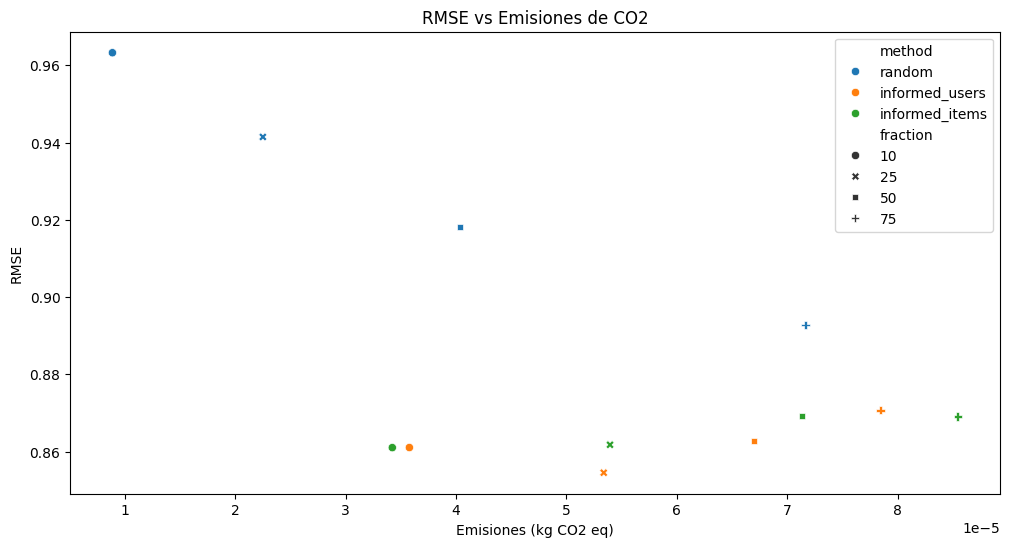

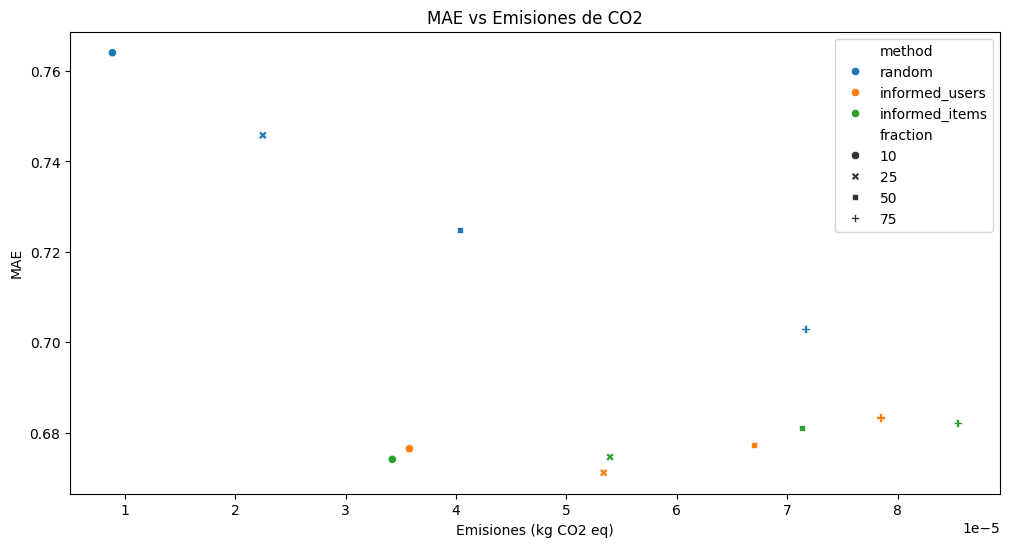

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='emissions_kg', y='rmse', hue='method', style='fraction', data=metrics_df)
plt.xlabel("Emisiones (kg CO2 eq)")
plt.ylabel("RMSE")
plt.title("RMSE vs Emisiones de CO2")
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x='emissions_kg', y='mae', hue='method', style='fraction', data=metrics_df)
plt.xlabel("Emisiones (kg CO2 eq)")
plt.ylabel("MAE")
plt.title("MAE vs Emisiones de CO2")
plt.show()

# Comparativa Precision@K / Recall@K vs emisiones

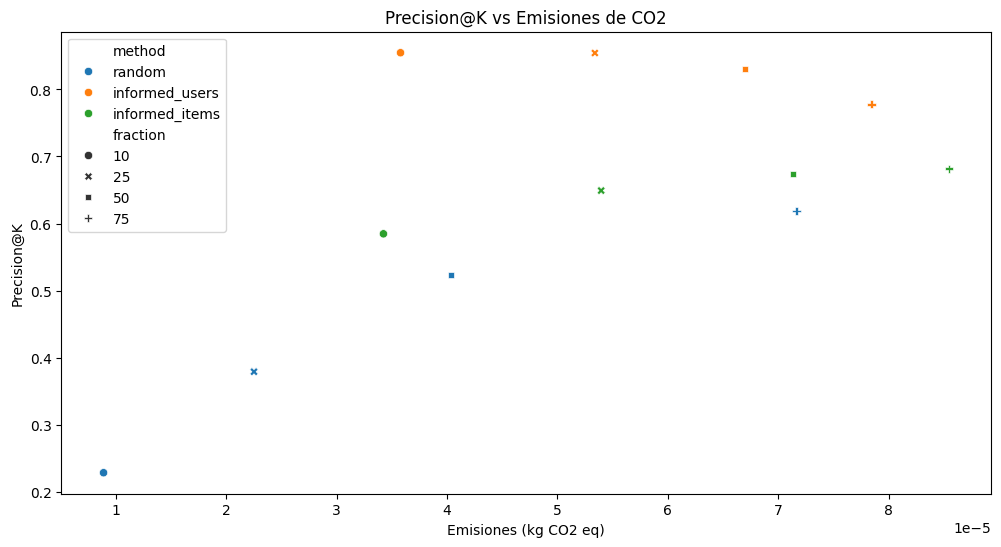

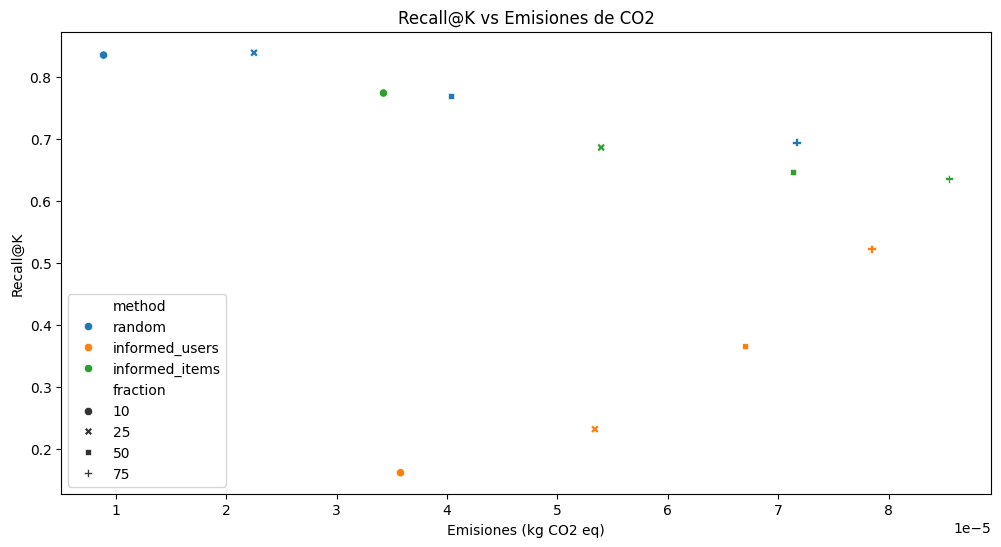

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='emissions_kg', y='precision_at_k', hue='method', style='fraction', data=metrics_df)
plt.xlabel("Emisiones (kg CO2 eq)")
plt.ylabel("Precision@K")
plt.title("Precision@K vs Emisiones de CO2")
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x='emissions_kg', y='recall_at_k', hue='method', style='fraction', data=metrics_df)
plt.xlabel("Emisiones (kg CO2 eq)")
plt.ylabel("Recall@K")
plt.title("Recall@K vs Emisiones de CO2")
plt.show()

# Análisis de trade-offs: RMSE vs emisiones vs fracción de dataset

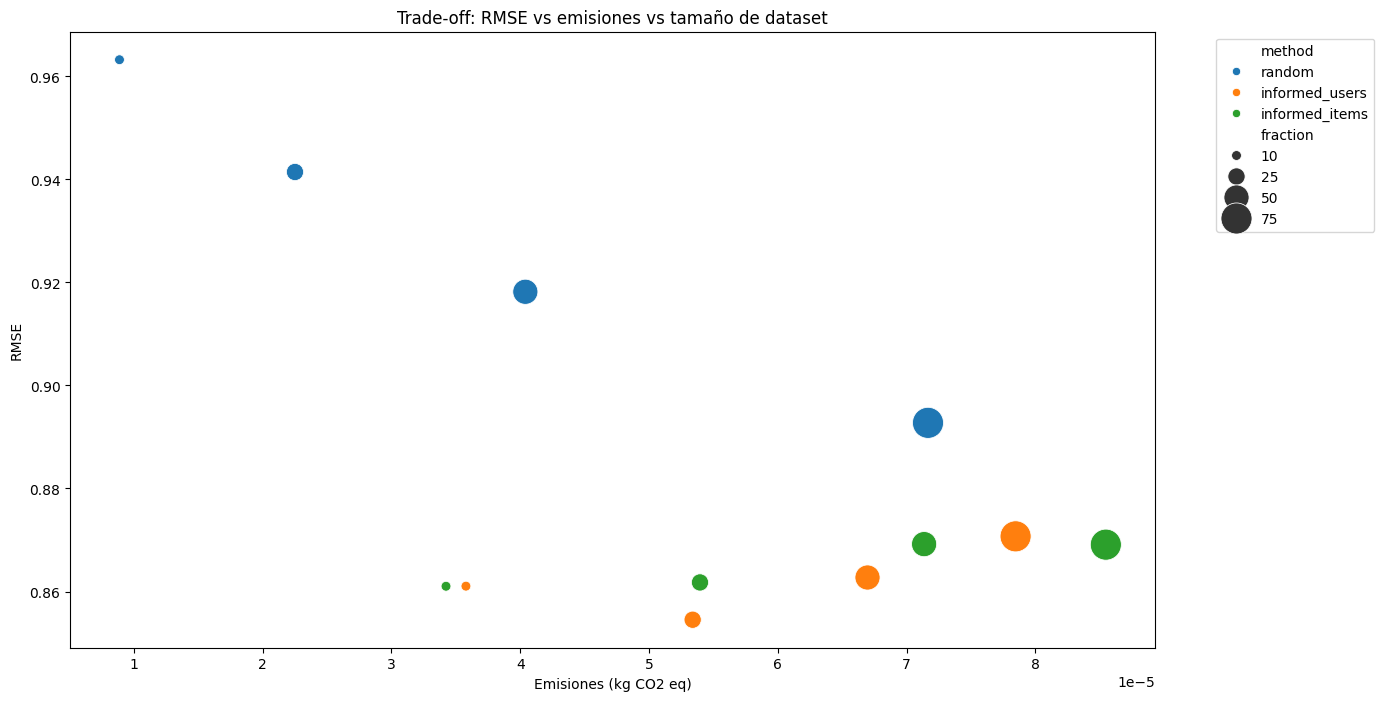

In [10]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    x='emissions_kg', y='rmse', size='fraction', hue='method',
    data=metrics_df, sizes=(50, 500)
)
plt.xlabel("Emisiones (kg CO2 eq)")
plt.ylabel("RMSE")
plt.title("Trade-off: RMSE vs emisiones vs tamaño de dataset")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Análisis y conclusiones

- Se visualizan los trade-offs entre **calidad de recomendación** y **coste energético**.
- Los odelos con menor consumo energético pueden sacrificar precisión.
- Esta visión integrada permite seleccionar modelos equilibrados según el objetivo: eficiencia o precisión.